In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

In [4]:
import datetime as dt
import numpy as np

import pymc as pm
import matplotlib.pyplot as plt


import mcstools.preprocess.l2.filter_and_bin as fb
from mcstools.loader import L2Loader
from mars_time import MarsTime

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
loader = L2Loader()

In [6]:
ddr1 = loader.load_ls_range(MarsTime.from_solar_longitude(29, 30), MarsTime.from_solar_longitude(29, 40))

In [7]:
ddr1["LTST"].max()

0.999773

In [8]:
filter = {
    "Profile_lat": (0, 5),
    "Profile_lon": (-150, -135),
    #"Obs_qual": [0, 1, 10, 11],
    "LTST": (0, 9/24)
}

In [9]:
print(ddr1.shape)
ddr1 = fb.filter_ddr1_df_from_config(ddr1, filter)
print(ddr1.shape)

(44598, 78)
Filtering Profile_lat to within (0, 5).
Filtering Profile_lon to within (-150, -135).
Filtering LTST to within (0, 0.375).
(11, 78)


In [10]:
ddr2 = loader.load("DDR2", profiles=ddr1["Profile_identifier"])

In [11]:
temps = ddr2.dropna(subset=["T"])

In [12]:
ex_level = 65
n_levels = 5
ex_level_temps = temps[temps["level"].between(ex_level-n_levels, ex_level+n_levels)]

array([[<Axes: title={'center': 'T'}>, <Axes: title={'center': 'Alt'}>]],
      dtype=object)

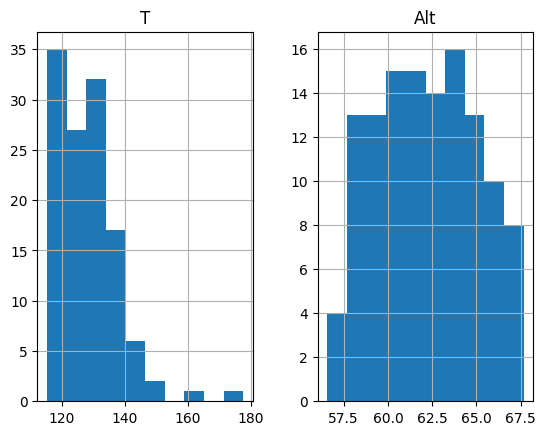

In [13]:
ex_level_temps[["T", "Alt"]].hist()

<Axes: >

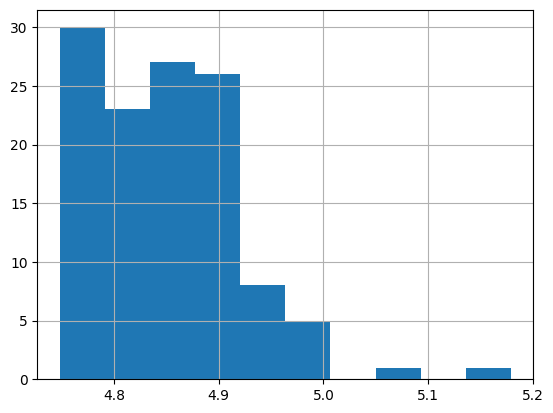

In [14]:
np.log(ex_level_temps["T"]).hist()

In [16]:

# Simulated data (truncated at 0)
data = ex_level_temps["T"]

with pm.Model() as model:
    mu = pm.Normal("mu", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=5)
    
    # Use TruncatedNormal directly
    obs = pm.TruncatedNormal("obs", mu=mu, sigma=sigma, lower=0, observed=data)
    
    trace = pm.sample(2000, tune=1000, target_accept=0.9, return_inferencedata=True)

ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/graph/rewriting/basic.py", line 1081, in transform
    return self.fn(fgraph, node)
  File "/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/tensor/rewriting/basic.py", line 1110, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/link/c/op.py", line 119, in make_thunk
    return self.make_c_thunk(node, storage_map, compute_m


You can find the C code in this temporary file: /tmp/pytensor_compilation_error__hcqg9ym

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_xnhmjlrs

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_4_vte6z3

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_f84tiztv


ERROR (pytensor.graph.rewriting.basic): Rewrite failure due to: constant_folding
ERROR (pytensor.graph.rewriting.basic): node: Cast{float64}(0)
ERROR (pytensor.graph.rewriting.basic): TRACEBACK:
ERROR (pytensor.graph.rewriting.basic): Traceback (most recent call last):
  File "/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/graph/rewriting/basic.py", line 1922, in process_node
    replacements = node_rewriter.transform(fgraph, node)
  File "/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/graph/rewriting/basic.py", line 1081, in transform
    return self.fn(fgraph, node)
  File "/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/tensor/rewriting/basic.py", line 1110, in constant_folding
    thunk = node.op.make_thunk(node, storage_map, compute_map, no_recycling=[])
  File "/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/link/c/op.py", line 119, in make_thunk
    return self.make_c_thunk(node, storage_map, compute_m


You can find the C code in this temporary file: /tmp/pytensor_compilation_error_6p84e32m

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_9mafadgq

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_ktgteg3c

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_qp2s_wfi

You can find the C code in this temporary file: /tmp/pytensor_compilation_error_7_q6aj_q


CompileError: Compilation failed (return status=1):
/usr/bin/g++ -shared -g -Wno-c++11-narrowing -fno-exceptions -fno-unwind-tables -fno-asynchronous-unwind-tables -march=znver1 -mmmx -mno-3dnow -msse -msse2 -msse3 -mssse3 -msse4a -mcx16 -msahf -mmovbe -maes -msha -mpclmul -mpopcnt -mabm -mno-lwp -mfma -mno-fma4 -mno-xop -mbmi -mno-sgx -mbmi2 -mno-pconfig -mwbnoinvd -mno-tbm -mavx -mavx2 -msse4.2 -msse4.1 -mlzcnt -mno-rtm -mno-hle -mrdrnd -mf16c -mfsgsbase -mrdseed -mprfchw -madx -mfxsr -mxsave -mxsaveopt -mno-avx512f -mno-avx512er -mno-avx512cd -mno-avx512pf -mno-prefetchwt1 -mclflushopt -mxsavec -mxsaves -mno-avx512dq -mno-avx512bw -mno-avx512vl -mno-avx512ifma -mno-avx512vbmi -mno-avx5124fmaps -mno-avx5124vnniw -mclwb -mmwaitx -mclzero -mno-pku -mrdpid -mno-gfni -mno-shstk -mno-avx512vbmi2 -mno-avx512vnni -mno-vaes -mno-vpclmulqdq -mno-avx512bitalg -mno-avx512vpopcntdq -mno-movdiri -mno-movdir64b --param l1-cache-size=32 --param l1-cache-line-size=64 --param l2-cache-size=512 -mtune=znver1 -DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION -m64 -fPIC -I/home/mslipski/mcstools/env/lib64/python3.9/site-packages/numpy/core/include -I/usr/include/python3.9 -I/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/link/c/c_code -L/usr/lib64 -fvisibility=hidden -o /home/mslipski/.pytensor/compiledir_Linux-5.4-el8uek.x86_64-x86_64-with-glibc2.28-x86_64-3.9.20-64/lazylinker_ext/lazylinker_ext.so /home/mslipski/.pytensor/compiledir_Linux-5.4-el8uek.x86_64-x86_64-with-glibc2.28-x86_64-3.9.20-64/lazylinker_ext/mod.cpp -lpython3.9
In file included from /home/mslipski/.pytensor/compiledir_Linux-5.4-el8uek.x86_64-x86_64-with-glibc2.28-x86_64-3.9.20-64/lazylinker_ext/mod.cpp:1:
/home/mslipski/mcstools/env/lib64/python3.9/site-packages/pytensor/link/c/c_code/pytensor_mod_helper.h:4:10: fatal error: Python.h: No such file or directory
 #include <Python.h>
          ^~~~~~~~~~
compilation terminated.
